<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


Text(0.5, 1.0, 'Median value of owner-occupied homes')

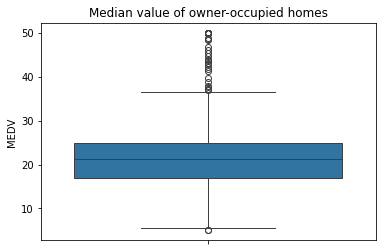

In [3]:
ax=sns.boxplot(data=boston_df, x=None, y="MEDV")
ax.set_title('Median value of owner-occupied homes')


Text(0.5, 1.0, 'Number of homes that bounds Charles River')

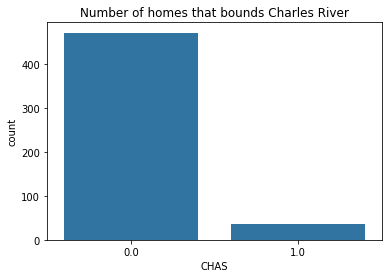

In [4]:
ax2=sns.countplot(x = 'CHAS',
            data = boston_df)
ax2.set_title('Number of homes that bounds Charles River')


In [5]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = '70 years and older'

Text(0.5, 1.0, 'Median value of owner-occupied homes by each age group')

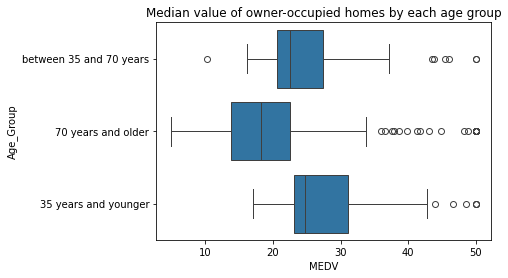

In [6]:
ax3 = sns.boxplot(x = 'MEDV', y = 'Age_Group', data = boston_df)
ax3.set_title('Median value of owner-occupied homes by each age group')


Text(0.5, 1.0, 'Nitric oxide concentration per proportion of non-retail business acres per town')

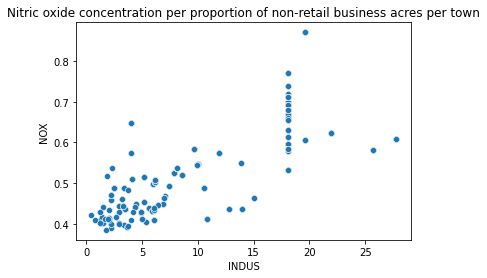

In [7]:
ax4 = sns.scatterplot(y = 'NOX', x = 'INDUS', data = boston_df)
ax4.set_title('Nitric oxide concentration per proportion of non-retail business acres per town')

Generally, the higher the non-retail business acres per town, the higher the concentration of Nitric oxide.


Text(0.5, 1.0, 'Pupil to teacher ratio by town')

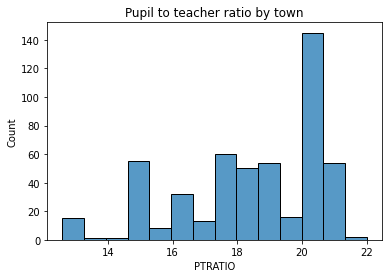

In [8]:
ax5 = sns.histplot(x = 'PTRATIO', data = boston_df)
ax5.set_title('Pupil to teacher ratio by town')


In [9]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'], 
                      boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

Given the p-value is less than 0.05, we reject the Null Hypothesis, meaning there is a statistical difference in median value between houses near the Charles River and houses far away



In [10]:
from statsmodels.formula.api import ols
lm = ols('MEDV ~ AGE', data = boston_df).fit()
table = sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


Given p-value is less than 0.05, we reject the Null Hypothesis. Hence, there is statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940



In [11]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])


(0.7636514469209152, 7.913361061237794e-98)

Given that the p-value less than 0.05, we reject the Null Hypothesis. Hence, there is a statistical positive correlation(because corelation is positive 0.7) between Nitric oxide concentration and proportion of non-retail business acres per town

In [12]:
x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predisction = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        00:53:23   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coeffiecient of DIS of 1.0916 indicates that with every 1 unit increase in distance to the five emplyoment centres, there is a 1.0916 increase in the MEDV value. The p value is also significant beyond a 0.05 signicance level.